In [1]:
from utils_excel import read_log_databaseloader as databaseloader
import numpy as np
from utils_calculation import calculator

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np\
# check_line_list = [3,23,43,63,83,103,123,143,163,183,203,223,243,263,283,303,323,343,363,383,403,423]
check_line_list = [243,263,83,143,163,183,103,123,303,283,343,323,383,363,423,403,223,203]
check_line_with_inception_list = [243,263,83,143,163,183,103,123,303,283,343,323,383,363,423,403,444,223,203]
save_root_path = 'statistics_figure_float32/'
rld = databaseloader()
table_lenght = (len(check_line_list)+2)
c = calculator()
bar_width = 0.5


In [2]:
def get_parameter_number(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_parameter_number,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'resnext50_32x4d', 'resnext101_32x8d']
[1.3668, 2.2786, 3.5049, 11.6895, 21.7977, 25.557, 44.5492, 60.1928, 132.8633, 132.8688, 133.0478, 133.0537, 138.3575, 138.366, 143.6672, 143.6782, 25.0289, 88.7913]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.3668, 2.2786, 3.5049, 11.689500000000002, 21.797700000000003, 25.557000000000002, 44.549200000000006, 60.19280000000001, 132.86330000000004, 132.86880000000002, 133.04780000000002, 133.05370000000002, 138.35750000000002, 138.36600000000004, 143.66720000000004, 143.67820000000003, 25.028900000000004, 88.79130000000004]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


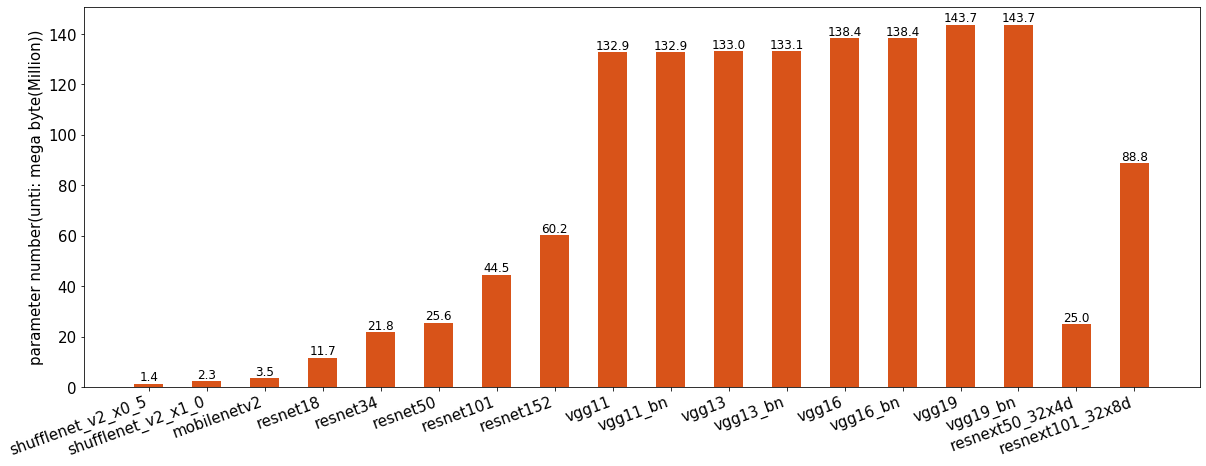

In [3]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_parameter_number(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,7))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 1), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('parameter number(unti: mega byte(Million))', fontsize=15)
plt.savefig(save_root_path + "parameter number.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [4]:
def get_GFLOPs(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_GFLOPs,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'resnext50_32x4d', 'resnext101_32x8d']
[0.05, 0.15, 0.31, 1.83, 3.68, 4.14, 7.87, 11.62, 7.63, 7.65, 11.34, 11.37, 15.51, 15.53, 19.67, 19.7, 4.29, 16.55]
[0.0, 0.0, 0.0, 2.220446049250313e-16, 4.440892098500626e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7763568394002505e-15, 0.0, 0.0, 0.0, 0.0]
[0.049999999999999996, 0.14999999999999997, 0.31, 1.83, 3.6800000000000006, 4.14, 7.870000000000001, 11.620000000000001, 7.630000000000001, 7.650000000000001, 11.340000000000002, 11.370000000000001, 15.510000000000002, 15.530000000000001, 19.670000000000005, 19.700000000000003, 4.29, 16.550000000000004]
[0.0, 0.0, 0.0, 2.220446049250313e-16, 4.440892098500626e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7763568394002505e-15, 0.0, 0.0, 0.0, 0.0]


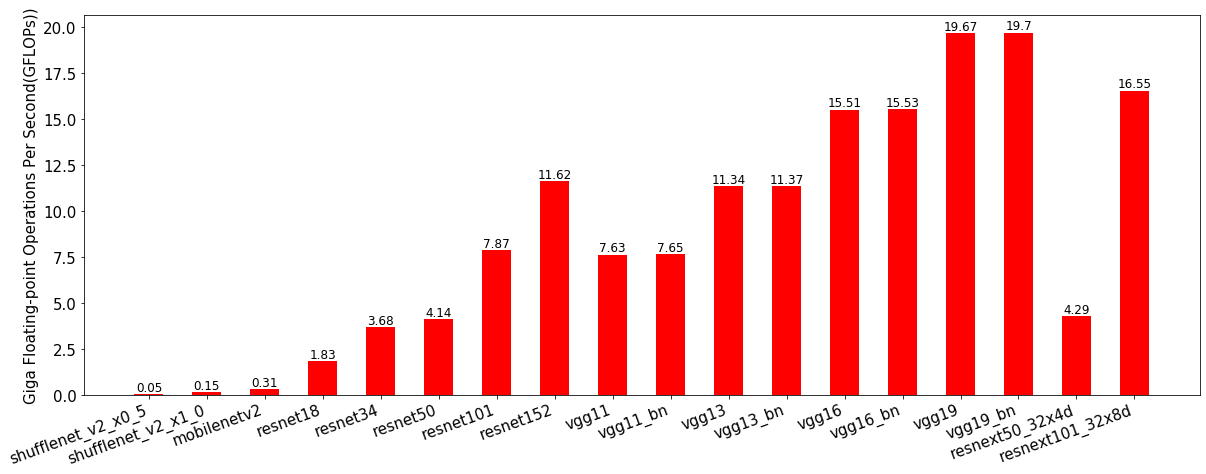

In [5]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_GFLOPs(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,7))

bar = plt.bar(x, model_geo_mean_list, bar_width, color="red")

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Giga Floating-point Operations Per Second(GFLOPs))', fontsize=15)
plt.savefig(save_root_path + "GFLOPs.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [6]:
def get_cuda_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_cuda_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[924.5328, 926.45685, 930.30505, 964.93896, 1007.2693, 1016.88983, 1088.0818, 1138.1085, 1397.8628, 1397.8628, 1397.8628, 1397.8628, 1417.1038, 1417.1038, 1455.5859, 1455.5859, 1016.88983, 1009.1934, 1243.9343]
[0.0, 1.1368683772161603e-13, 0.0, 1.1368683772161603e-13, 1.1368683772161603e-13, 1.1368683772161603e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2737367544323206e-13, 2.2737367544323206e-13, 0.0, 0.0, 1.1368683772161603e-13, 1.1368683772161603e-13, 0.0]
[924.5327578867019, 926.4568635222622, 930.3050747933827, 964.9389762334672, 1007.2693002157928, 1016.8898283935941, 1088.0817369093236, 1138.1084834338901, 1397.8627442345246, 1397.8627442345246, 1397.8627442345246, 1397.8627442345246, 1417.1038005901269, 1417.1038005901269, 145

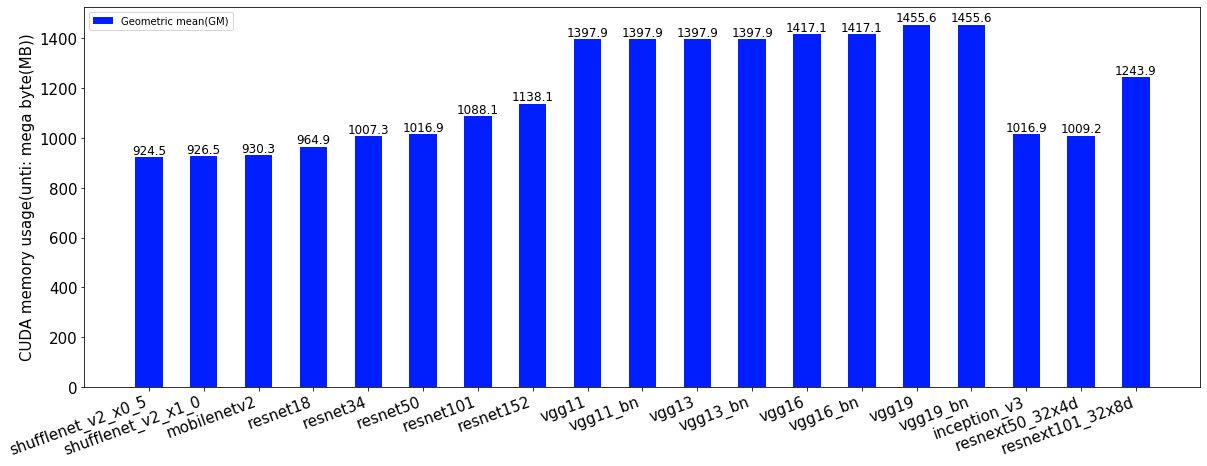

In [7]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_cuda_memory_usage_data(check_line_with_inception_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,7))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(0/256, 30/256, 255/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 1), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([bar], ["Geometric mean(GM)"], loc='upper left')

plt.ylabel('CUDA memory usage(unti: mega byte(MB))', fontsize=15)
plt.savefig(save_root_path + "CUDA memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [8]:
def get_host_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_host_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[2192.7942, 2191.361, 2201.4966, 2188.6614, 2191.869, 2203.8032, 2238.8958, 2275.4497, 2187.9282, 2185.8232, 2191.4775, 2191.3416, 2193.3682, 2187.6284, 2196.2732, 2188.8726, 2248.1182, 2202.7385, 2200.3481]
[1.9231422527709583, 2.663304968795728, 2.178480679321183, 1.023947618967668, 2.0517756552239916, 1.1918703221244868, 1.5363865423460084, 1.5964575177267761, 1.064709575266079, 1.139794272050949, 2.945616315186726, 2.057385283621443, 2.1691057682014616, 1.5523575457900733, 2.7237482330929197, 3.1030173491035384, 1.9400689538611005, 2.3425599145116394, 1.549679184157867]
[2192.788231150243, 2191.3498186262555, 2201.489125322528, 2188.6596486301705, 2191.8622405745123, 2203.801059044146, 2238.892015242936, 2275.445676328167, 21

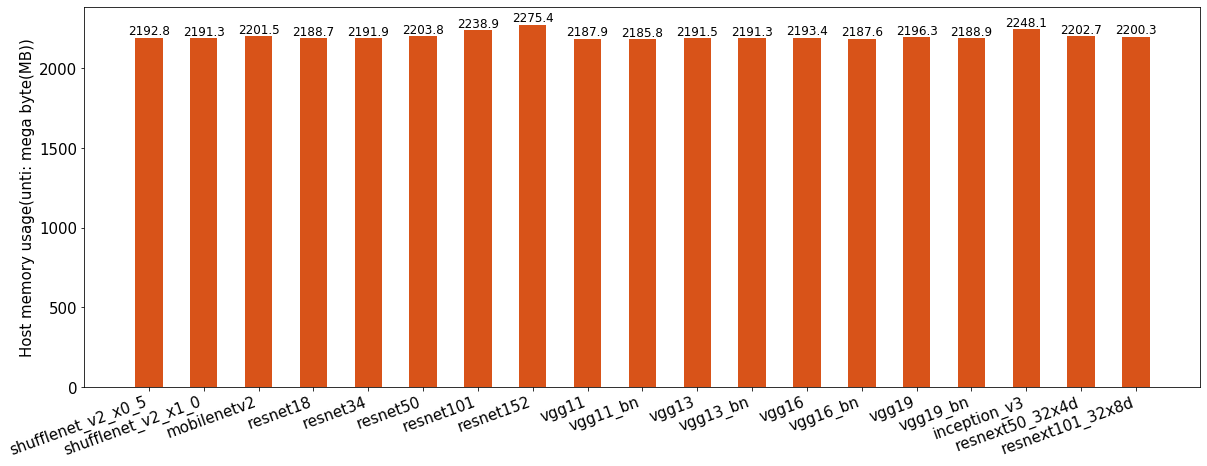

In [9]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_host_memory_usage_data(check_line_with_inception_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,7))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 1), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Host memory usage(unti: mega byte(MB))', fontsize=15)
plt.savefig(save_root_path + "Host memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [10]:
def get_storage_usage(estimate_line_list = []):# need to fill up all the size parameters
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_size,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[5.3, 8.81, 13.5, 44.6, 83.2, 97.7, 170.0, 230.0, 506.0, 506.0, 507.0, 507.0, 527.0, 527.0, 548.0, 548.0, 103.85, 95.7, 339.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[5.3, 8.810000000000002, 13.500000000000002, 44.60000000000001, 83.20000000000003, 97.70000000000003, 170.00000000000006, 230.00000000000006, 506.00000000000017, 506.00000000000017, 507.00000000000017, 507.00000000000017, 527.0000000000002, 527.0000000000002, 548.0000000000002, 548.0000000000002, 103.85000000000002, 95.70000000000003, 339.0000000000001]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


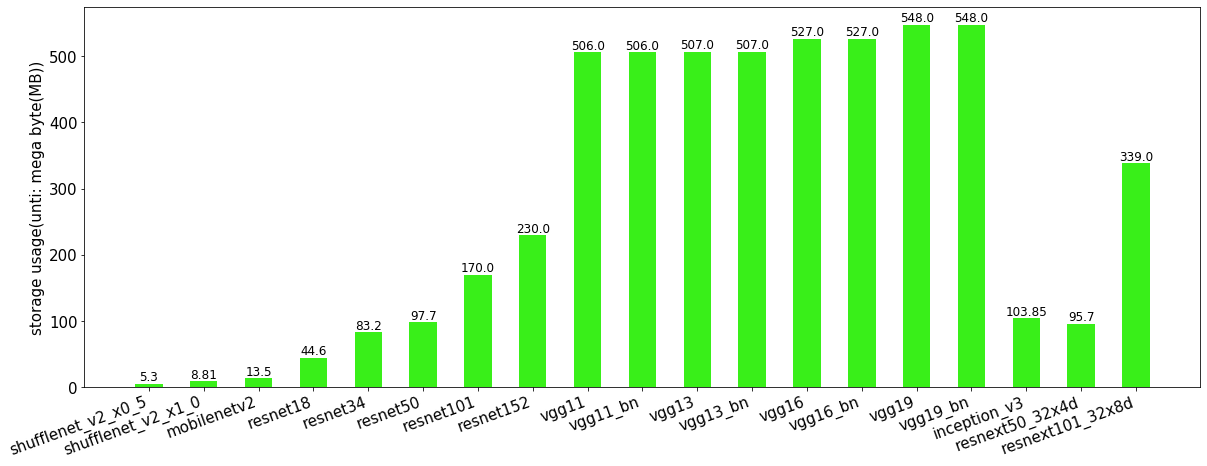

In [11]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_storage_usage(check_line_with_inception_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,7))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(57/256, 240/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('storage usage(unti: mega byte(MB))', fontsize=15)
plt.savefig(save_root_path + "storage usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [12]:
def get_inference_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Inference_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[0.3560624, 0.3518004, 0.33142754, 0.34529695, 0.3415779, 0.3359144, 0.32493025, 0.3066225, 0.35095766, 0.3497802, 0.34450606, 0.3234636, 0.3462168, 0.33071706, 0.3306272, 0.34358266, 0.33092916, 0.3268411, 0.3429366]
[0.022462443098196394, 0.0016573193993495439, 0.014304214468263798, 0.0032951205290845387, 0.0028996538512638947, 0.0027825141921564156, 0.00145046761598705, 0.007406887555437114, 0.01712391419151793, 0.0071659505309987215, 0.007373075228544135, 0.003289166066395899, 0.003424489409534437, 0.0012261257554773697, 0.0020781013029481654, 0.0023055780568309037, 0.004980132297639384, 0.0021026163669515263, 0.003124576751300734]
[0.35252493531590295, 0.3517730569249686, 0.32973931788319, 0.34519150578329544, 0.341490482459

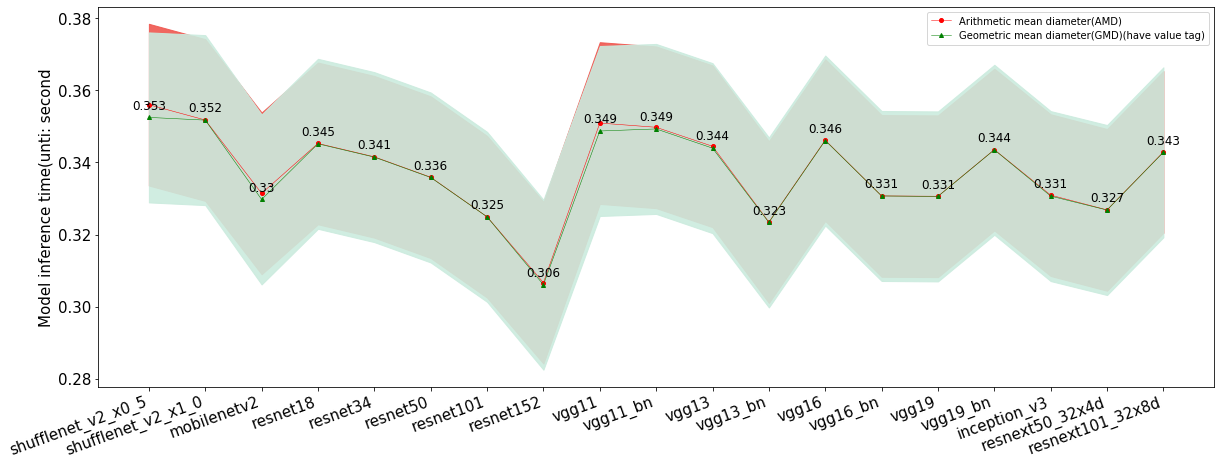

In [13]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_inference_time(check_line_with_inception_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,7))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 3), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper right')

plt.ylabel('Model inference time(unti: second', fontsize=15)
plt.savefig(save_root_path + "Model inference time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [14]:
def get_running_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_running_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[765.6395, 763.496, 812.261, 622.5711, 674.62256, 664.1389, 757.24304, 820.584, 795.8906, 887.9338, 811.8791, 737.0374, 791.4966, 706.1255, 773.95636, 775.3661, 746.49286, 1199.7925, 874.45447]
[25.547688327245396, 19.961515044153657, 13.925965292232377, 26.570650202080742, 33.429631303571, 23.68143269022096, 22.6220782558338, 25.88259979085069, 9.25274407291181, 15.124466010004426, 18.500765833811897, 13.203097344703338, 39.24232753790898, 19.294343408590066, 15.861162885316617, 14.276087687707331, 29.32234666611555, 57.175030376311724, 24.419210305649926]
[762.8593579286154, 761.6550137844395, 811.3765789978099, 618.7932706420104, 668.5773855394405, 661.3772854846867, 754.8102178169254, 818.018986539533, 795.5116371378435, 887.

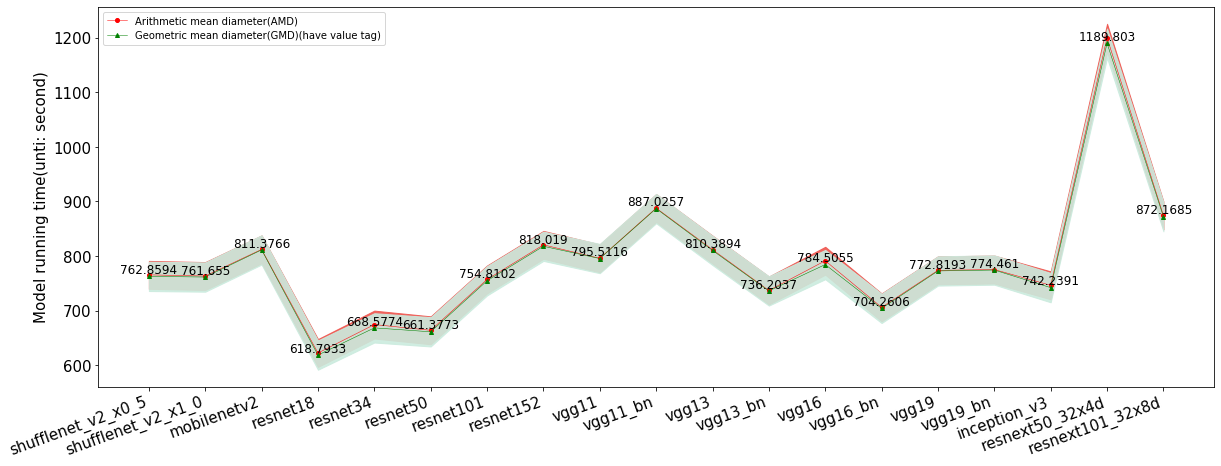

In [15]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_running_time(check_line_with_inception_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,7))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')

plt.ylabel('Model running time(unti: second)', fontsize=15)
plt.savefig(save_root_path + "Model running time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [16]:
def get_Top1_accuracy_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Top1_Accuracy,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[60.552, 69.362, 71.878, 69.758, 73.314, 76.13, 77.374, 78.312, 69.02, 70.37, 69.93, 71.586, 71.592, 73.36, 72.376, 74.218, 69.864, 77.618, 79.312]
[7.105427357601002e-15, 0.0, 0.0, 0.0, 0.0, 1.4210854715202004e-14, 0.0, 0.0, 0.0, 1.4210854715202004e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[60.552000000000014, 69.36200000000001, 71.87800000000001, 69.75800000000001, 73.31400000000001, 76.13000000000001, 77.37400000000001, 78.31200000000001, 69.02000000000001, 70.37000000000002, 69.93000000000002, 71.58600000000001, 71.59200000000001, 73.36000000000001, 72.37600000000002, 74.21800000000002, 69.86400000000002, 77.61800000000001, 79.31200000000001]
[7.105427357601002e-15, 0.0, 0.0, 0.0, 0.0, 1.4210854715202004e-14, 0.0, 0.0

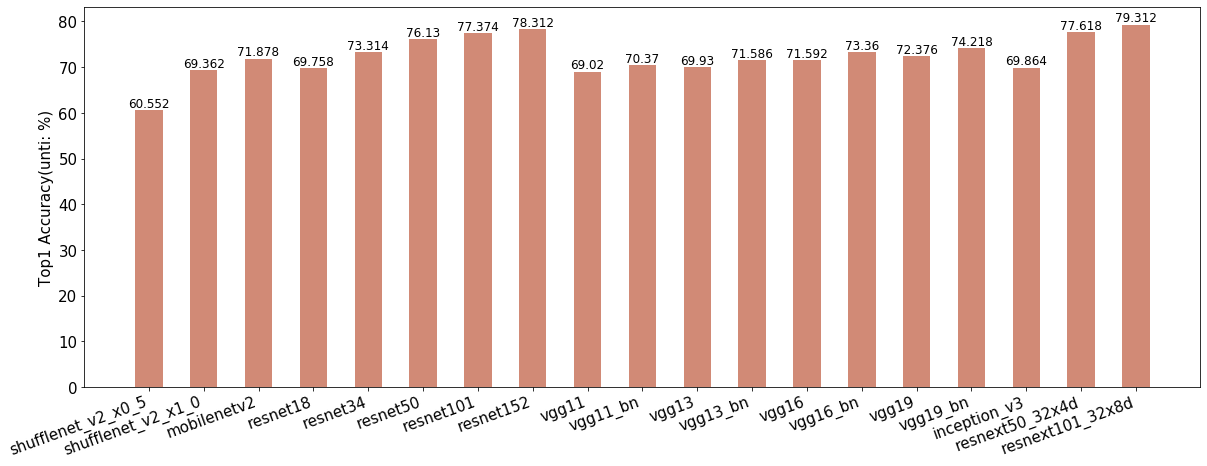

In [17]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_Top1_accuracy_data(check_line_with_inception_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,7))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(210/256, 139/256, 118/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Top1 Accuracy(unti: %)', fontsize=15)
plt.savefig(save_root_path + "Top1 Accuracy.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [18]:
def get_Top5_accuracy_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Top5_Accuracy,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[81.746, 88.316, 90.286, 89.076, 91.42, 92.862, 93.546, 94.046, 88.628, 89.81, 89.246, 90.374, 90.382, 91.516, 90.876, 91.842, 88.902, 93.698, 94.526]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[81.74600000000001, 88.31600000000003, 90.28600000000003, 89.07600000000002, 91.42000000000003, 92.86200000000002, 93.54600000000003, 94.04600000000003, 88.62800000000003, 89.81000000000003, 89.24600000000001, 90.37400000000002, 90.38200000000003, 91.51600000000003, 90.87600000000003, 91.84200000000003, 88.90200000000003, 93.69800000000002, 94.52600000000002]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


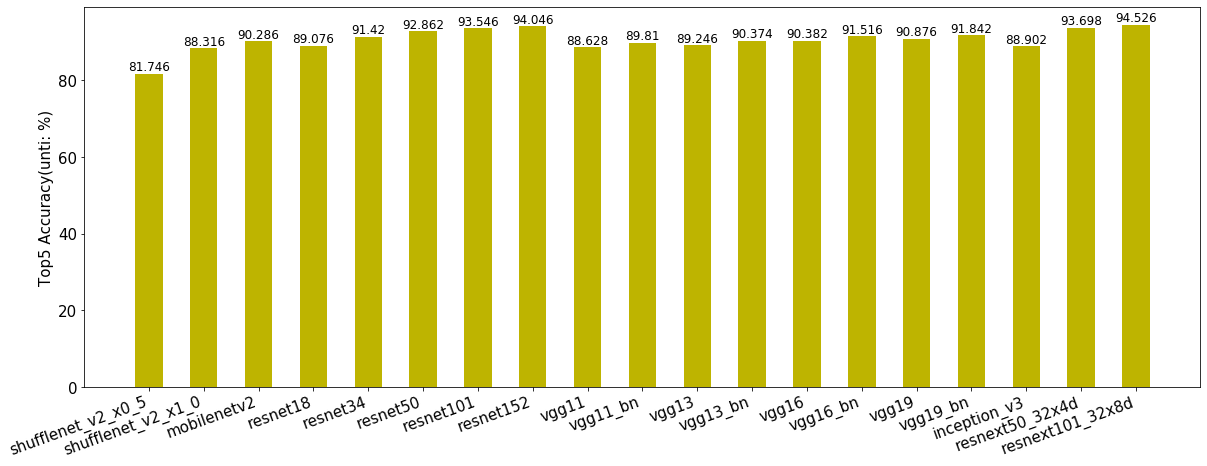

In [19]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_Top5_accuracy_data(check_line_with_inception_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,7))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(191/256, 181/256, 0/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Top5 Accuracy(unti: %)', fontsize=15)
plt.savefig(save_root_path + "Top5 Accuracy.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [20]:
def get_crossentropy_loss_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_cross_entropy_loss,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[0.00895072, 0.00682645, 0.00576156, 0.00626162, 0.00542834, 0.00482849, 0.00457804, 0.00440015, 0.00632801, 0.00600723, 0.00613132, 0.00574469, 0.00575014, 0.00535221, 0.00560003, 0.00523389, 0.00904846, 0.0047193, 0.00465169]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.008950719999999999, 0.006826449999999999, 0.005761559999999998, 0.006261619999999998, 0.0054283399999999985, 0.004828489999999999, 0.0045780399999999985, 0.004400149999999999, 0.0063280099999999985, 0.006007229999999998, 0.006131319999999998, 0.0057446899999999985, 0.005750139999999998, 0.005352209999999998, 0.005600029999999998, 0.005233889999999998, 0.009048459999999998, 0.004719299999999998, 0.004651689999

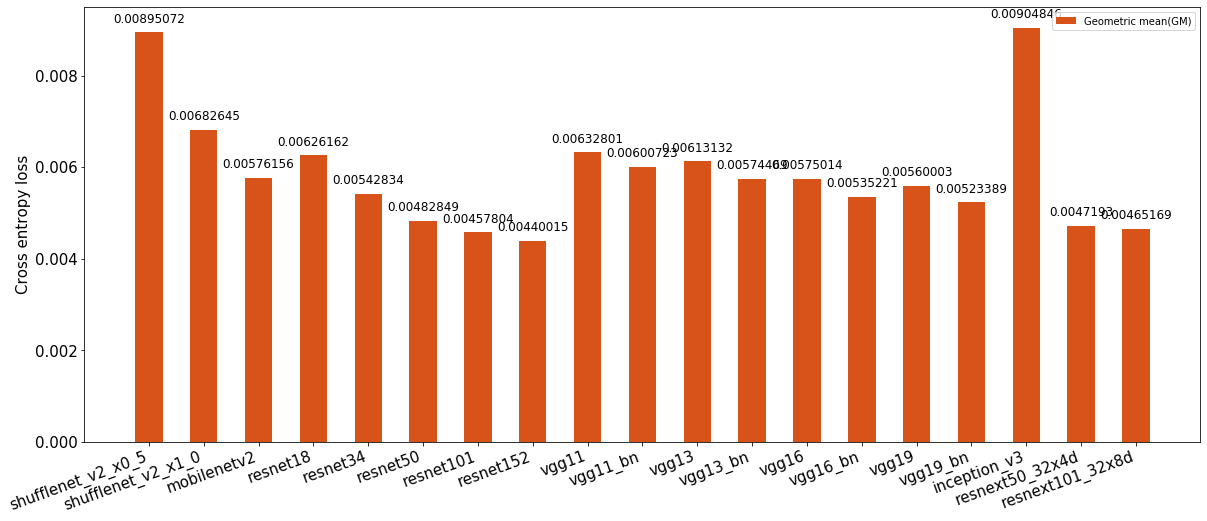

In [21]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_crossentropy_loss_data(check_line_with_inception_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,8))

bar = plt.bar(x, model_geo_mean_list, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_geo_mean_list):
    plt.text(x_axis, b+0.00015, round(b, 8), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Geometric mean(GM)"], loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Cross entropy loss', fontsize=15)
plt.savefig(save_root_path +"Cross entropy loss.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [22]:
def get_f1_score(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_F1_score,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[0.5989082, 0.6901337, 0.7151568, 0.6929891, 0.7296244, 0.7583254, 0.7711684, 0.7805866, 0.6854438, 0.6989278, 0.694549, 0.7112163, 0.7116665, 0.7298424, 0.7195907, 0.738582, 0.6941376, 0.7732619, 0.7905506]
[0.0019999591574078046, 0.001848591771282826, 0.0017574211803004225, 0.0018372327698340518, 0.0017676475550252313, 0.0016758524967381838, 0.0016493786500776375, 0.0015985213236960893, 0.0018705661385947092, 0.0018264264245617667, 0.0018359922294302056, 0.0017977950083496452, 0.0017988676244869994, 0.0017662016716277762, 0.0017923648262390124, 0.0017155947907310232, 0.0018478876720964266, 0.0016592239778673301, 0.0015900757083964212]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

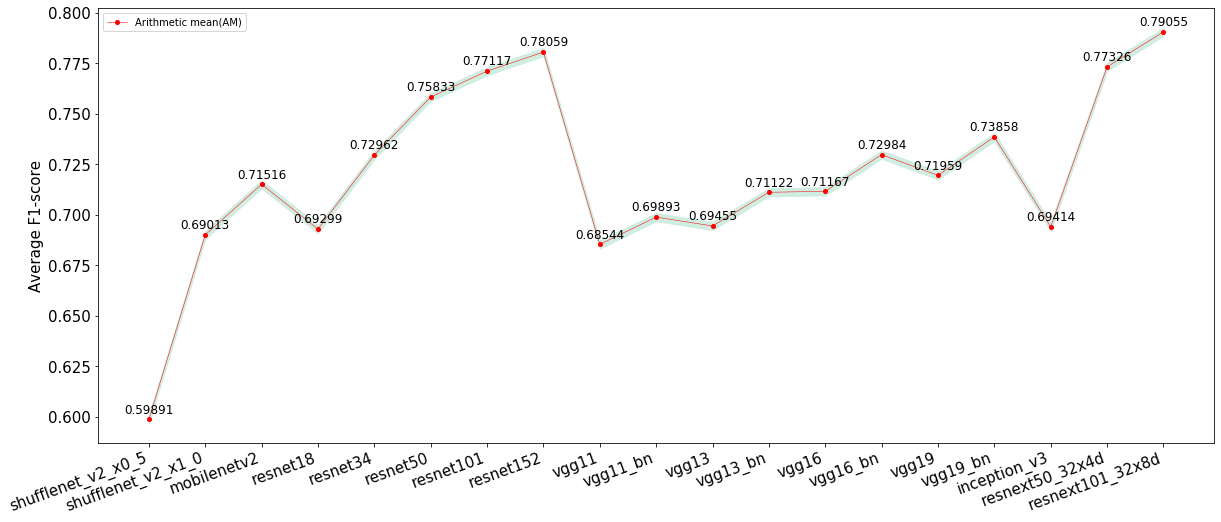

In [23]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_f1_score(check_line_with_inception_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,8))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 5), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([line1], ["Arithmetic mean(AM)"], loc='upper left')
plt.ylabel('Average F1-score', fontsize=15)
plt.savefig(save_root_path + "Average F1-score.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [24]:
def get_precision_score(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_precision,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

In [25]:
def get_recall(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        a = rld.read_line_vector(rld.read_recall,select_model_id_list)
        current_model_result_list= eval('['+str(a).replace(' ','').replace('[','').replace(']','')+']')
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn', 'inception_v3', 'resnext50_32x4d', 'resnext101_32x8d']
[0.60552, 0.69362, 0.71878, 0.69758, 0.73314, 0.7613, 0.77374, 0.78312, 0.6902, 0.7037, 0.6993, 0.71586, 0.71592, 0.7336, 0.72376, 0.74218, 0.69864, 0.77618, 0.79312]
[0.0022647975627907435, 0.002053988695735365, 0.001973863816700394, 0.0020909499243131346, 0.0019909526510333286, 0.0019029487995879668, 0.0018542718528408164, 0.0018183590027450736, 0.002108571582405183, 0.002092352351614424, 0.002085578328355542, 0.0020543695124981554, 0.0020360632394098577, 0.0020091108357345178, 0.002034950292633342, 0.0019503918592079783, 0.0021173492094832547, 0.0018715768162707036, 0.0017946949642605459]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.002264902476747862, 0.0020540838442313844

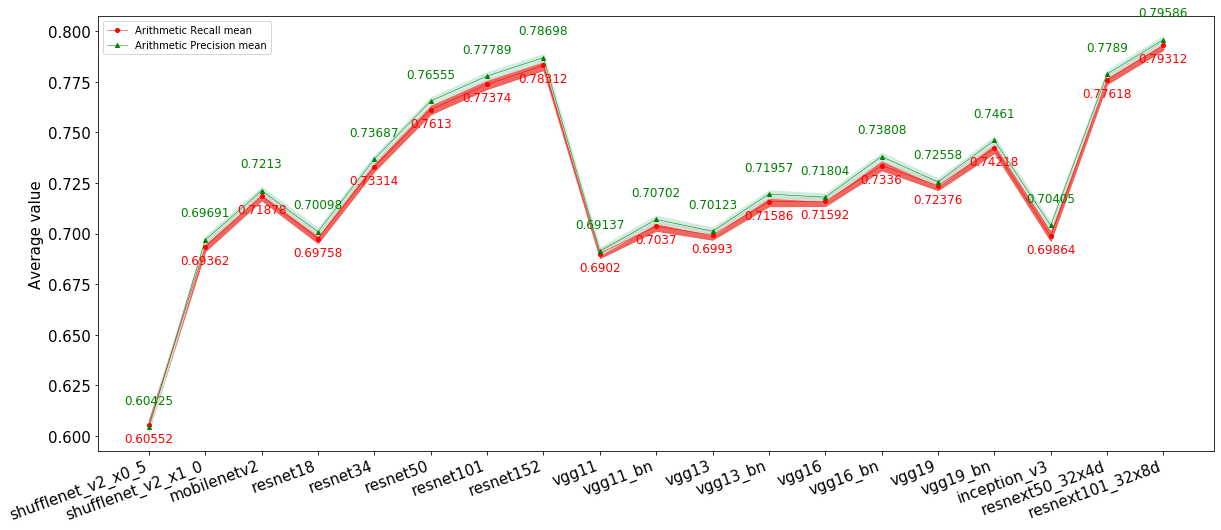

In [26]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_recall(check_line_with_inception_list)
model_name_list1, model_mean_list1, model_mean_confinterval1, model_geo_mean_list1, model_geo_mean_confinterval1 = get_precision_score(check_line_with_inception_list)

print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)
print(model_mean_list1)
x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(table_lenght,8))

# line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)

# plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)


line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_mean_list1, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_mean_list1 - model_mean_confinterval1[0], model_mean_list1 + model_mean_confinterval1[0], color=(204/256, 236/256, 223/256), alpha=0.9)


#show the bar spesific number
for x_axis, a, b, c in zip(x, x_lable, model_mean_list, model_mean_list1):
    plt.text(x_axis, b-0.01, round(b, 5), ha='center', va='bottom', fontsize=12, color='red')
    plt.text(x_axis, c+0.01, round(c, 5), ha='center', va='bottom', fontsize=12, color='green')


plt.xticks(rotation=20)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([line1,line2], ["Arithmetic Recall mean", "Arithmetic Precision mean"], loc='down right')
# plt.title("Arithmetic mean(AM) Recall")
plt.ylabel('Average value', fontsize=15)
plt.savefig(save_root_path + "Average Recall and Precision.png",dpi=500,bbox_inches = 'tight')
plt.show()